Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Samantha Yu"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from decimal import *
from pandas.plotting import autocorrelation_plot

In [3]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
%env QUANDL_API_KEY = 9S-27RJsrdMePDD8MxzN

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "9S-27RJsrdMePDD8MxzN"

env: QUANDL_API_KEY=9S-27RJsrdMePDD8MxzN


### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [4]:
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

#amzn = pdr.get_data_yahoo('AMZN', start = start)

In [5]:
# 2) Using fix_yahoo_finance library only to download AMZN data
start = '2014-03-01'
end = '2019-03-01'

# Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months
fb = yf.download('FB', start, end)['Adj Close']
mmm = yf.download('MMM', start, end)['Adj Close']
ibm = yf.download('IBM', start, end)['Adj Close']
amzn = yf.download('AMZN', start, end)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [6]:
# Resample the data to get prices for the end of the business month

fb = fb.asfreq(freq = 'BM', method='pad')
mmm = mmm.asfreq(freq = 'BM', method='pad')
ibm = ibm.asfreq(freq = 'BM', method='pad')
amzn = amzn.asfreq(freq = 'BM', method='pad')

In [7]:
fb.head()

Date
2014-03-31    60.240002
2014-04-30    59.779999
2014-05-30    63.299999
2014-06-30    67.290001
2014-07-31    72.650002
Freq: BM, Name: Adj Close, dtype: float64

In [8]:
fb.tail()

Date
2018-10-31    151.789993
2018-11-30    140.610001
2018-12-31    131.089996
2019-01-31    166.690002
2019-02-28    161.449997
Freq: BM, Name: Adj Close, dtype: float64

In [9]:
mmm.head()

Date
2014-03-31    119.584930
2014-04-30    122.608490
2014-05-30    126.429359
2014-06-30    127.041283
2014-07-31    124.957031
Freq: BM, Name: Adj Close, dtype: float64

In [10]:
mmm.tail()

Date
2018-10-31    187.671997
2018-11-30    206.492355
2018-12-31    189.231689
2019-01-31    198.924683
2019-02-28    207.389999
Freq: BM, Name: Adj Close, dtype: float64

In [11]:
ibm.head()

Date
2014-03-31    157.730820
2014-04-30    160.992111
2014-05-30    151.948441
2014-06-30    149.401718
2014-07-31    157.973312
Freq: BM, Name: Adj Close, dtype: float64

In [12]:
ibm.tail()

Date
2018-10-31    112.665642
2018-11-30    122.838776
2018-12-31    112.360855
2019-01-31    132.871872
2019-02-28    138.130005
Freq: BM, Name: Adj Close, dtype: float64

In [13]:
amzn.head()

Date
2014-03-31    336.369995
2014-04-30    304.130005
2014-05-30    312.549988
2014-06-30    324.779999
2014-07-31    312.989990
Freq: BM, Name: Adj Close, dtype: float64

In [14]:
amzn.tail()

Date
2018-10-31    1598.010010
2018-11-30    1690.170044
2018-12-31    1501.969971
2019-01-31    1718.729980
2019-02-28    1639.829956
Freq: BM, Name: Adj Close, dtype: float64

In [15]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']
all_stocks = yf.download(all_stocks_list, start, end)['Adj Close'].asfreq(freq = 'BM', method='pad')

[*********************100%***********************]  4 of 4 downloaded


In [16]:
all_stocks.head()

,AMZN,FB,IBM,MMM
Date,,,,
2014-03-31,336.369995,60.240002,157.730820,119.584930
2014-04-30,304.130005,59.779999,160.992111,122.608490
2014-05-30,312.549988,63.299999,151.948441,126.429359
2014-06-30,324.779999,67.290001,149.401718,127.041283
2014-07-31,312.989990,72.650002,157.973312,124.957031


In [17]:
all_stocks.tail()

,AMZN,FB,IBM,MMM
Date,,,,
2018-10-31,1598.010010,151.789993,112.665642,187.671997
2018-11-30,1690.170044,140.610001,122.838776,206.492355
2018-12-31,1501.969971,131.089996,112.360855,189.231689
2019-01-31,1718.729980,166.690002,132.871872,198.924683
2019-02-28,1639.829956,161.449997,138.130005,207.389999


Text(0.5, 0, 'Lag (Months)')

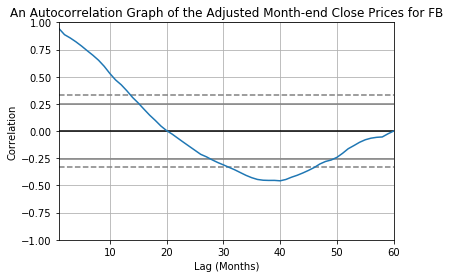

In [18]:
# Plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

fbTimePlot = pd.plotting.autocorrelation_plot(fb)
fbTimePlot.set_title("An Autocorrelation Graph of the Adjusted Month-end Close Prices for FB")
fbTimePlot.set_ylabel("Correlation")
fbTimePlot.set_xlabel("Lag (Months)")

Text(0.5, 0, 'Lag (Months)')

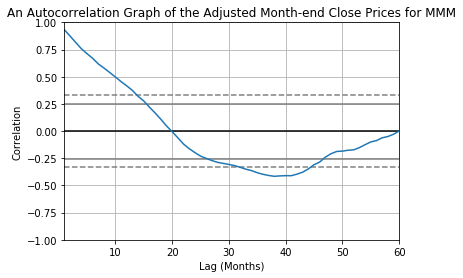

In [19]:
mmmTimePlot = pd.plotting.autocorrelation_plot(mmm)
mmmTimePlot.set_title("An Autocorrelation Graph of the Adjusted Month-end Close Prices for MMM")
mmmTimePlot.set_ylabel("Correlation")
mmmTimePlot.set_xlabel("Lag (Months)")

Text(0.5, 0, 'Lag (Months)')

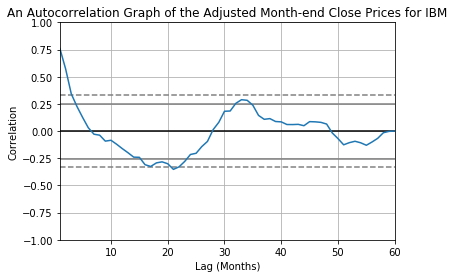

In [20]:
ibmTimePlot = pd.plotting.autocorrelation_plot(ibm)
ibmTimePlot.set_title("An Autocorrelation Graph of the Adjusted Month-end Close Prices for IBM")
ibmTimePlot.set_ylabel("Correlation")
ibmTimePlot.set_xlabel("Lag (Months)")

Text(0.5, 0, 'Lag (Months)')

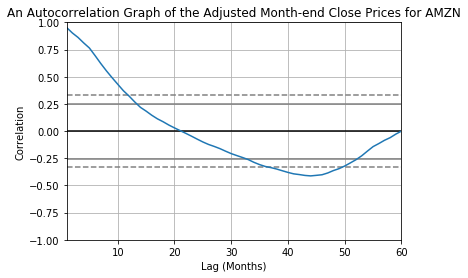

In [21]:
amznTimePlot = pd.plotting.autocorrelation_plot(amzn)
amznTimePlot.set_title("An Autocorrelation Graph of the Adjusted Month-end Close Prices for AMZN")
amznTimePlot.set_ylabel("Correlation")
amznTimePlot.set_xlabel("Lag (Months)")

If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the adjusted closed price is correlated to time. From the above graphs, we can observe a similar trend among FB, MMM, and AMZN stocks: past returns seem to influence its future return. We can see that in the first 10 months, there is a positive correlation between stock price and time. From 2015 - 2017, a negative correlation is shown. However, the autocorrelation plot for IBM shows that most of the correlaton are not statistically significant. This indicates that the returns are not highly correlated.

Text(0.5, 0, 'Lag (Months)')

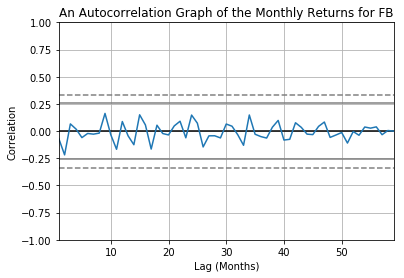

In [22]:
# Calculate the monthly returns for each stock using the "shift trick"

fbShiftedPlot = pd.plotting.autocorrelation_plot((fb / fb.shift(1) - 1).dropna())
fbShiftedPlot.set_title("An Autocorrelation Graph of the Monthly Returns for FB")
fbShiftedPlot.set_ylabel("Correlation")
fbShiftedPlot.set_xlabel("Lag (Months)")

Text(0.5, 0, 'Lag (Months)')

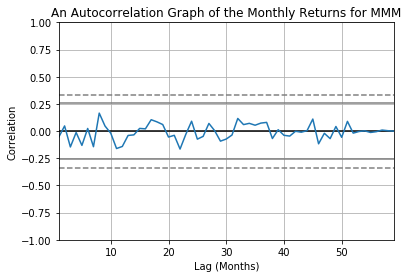

In [23]:
mmmShiftedPlot = pd.plotting.autocorrelation_plot((mmm / mmm.shift(1) - 1).dropna())
mmmShiftedPlot.set_title("An Autocorrelation Graph of the Monthly Returns for MMM")
mmmShiftedPlot.set_ylabel("Correlation")
mmmShiftedPlot.set_xlabel("Lag (Months)")

Text(0.5, 0, 'Lag (Months)')

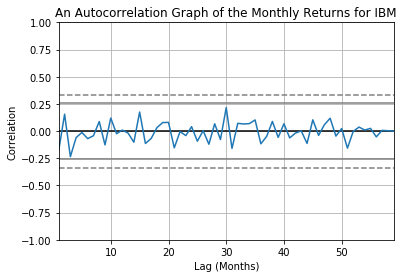

In [24]:
ibmShiftedPlot = pd.plotting.autocorrelation_plot((ibm / ibm.shift(1) - 1).dropna())
ibmShiftedPlot.set_title("An Autocorrelation Graph of the Monthly Returns for IBM")
ibmShiftedPlot.set_ylabel("Correlation")
ibmShiftedPlot.set_xlabel("Lag (Months)")

Text(0.5, 0, 'Lag (Months)')

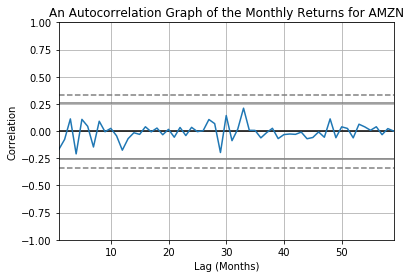

In [25]:
amznShiftedPlot = pd.plotting.autocorrelation_plot((amzn / amzn.shift(1) - 1).dropna())
amznShiftedPlot.set_title("An Autocorrelation Graph of the Monthly Returns for AMZN")
amznShiftedPlot.set_ylabel("Correlation")
amznShiftedPlot.set_xlabel("Lag (Months)")

From the above graphs, we can observe a similar trend among all four stocks. Time is insignificantly related to the return. As we can see in the plot, there is no significant trend seen in the month-end returns, the values are randomly distributed, and therefore, we can conclude that the stock price returns are not affected by time.

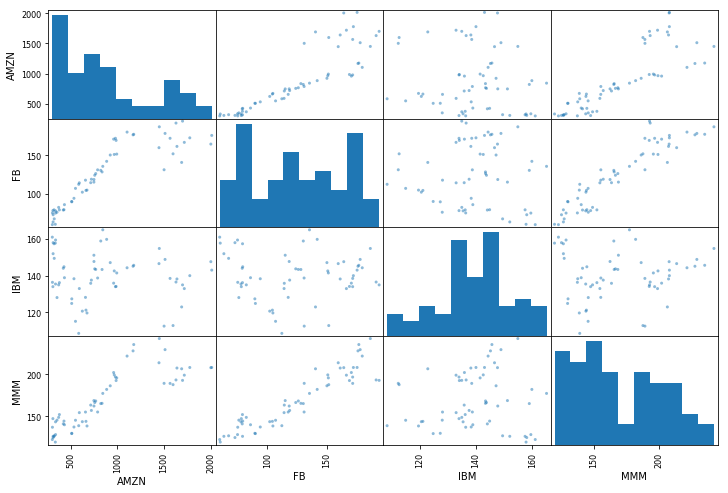

In [26]:
# Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(all_stocks, figsize = (12,8))
plt.show()

For all the pairs of stocks that do not include IBM, the scatter plots show an uphill pattern as we move from left to right, this indicates a positive relationship between the pairs. However, for other pairs of stocks with IBM, the plots do not seem to resemble any kind of pattern (even a vague one) in the graph, which indicates no relationship exists between AMZM/FB/MMM and IBM stocks.